In [1]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans #There are KMeans classes in the sklearn.cluster library that can be used directly.
import skimage.io as io
from PIL import Image
import os.path
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

In [2]:
cd ..

/home/zhu690


In [3]:
#①Call the get_filenames function to get the names of the pictures in the image_datasets folder after stitching
def get_filenames(path):
    path_filenames = []
    filenames = os.listdir(path)# os.listdir() method is used to return a list of the names of files or folders contained in the specified folder.
    for file in filenames:
        if not file.startswith('.'):
            path_filenames.append(os.path.join(path, file)) #os.path.join Path stitching
    return path_filenames

path_filenames = get_filenames("Downloads/dog")
#print(path_filenames)
imgs = os.listdir('Downloads/dog')
imgnum = len(imgs) 

In [4]:
#feature extraction of descriptors with ORB
features = []
#After many experiments, it is found that when the number of extracted feature points is less than 100, the clustering effect is relatively good
orb = cv2.ORB_create() #Use ORB algorithm to extract image features
#surf = cv2.xfeatures2d.SURF_create(400)#Use SURF algorithm to extract image features
#sift = cv2.xfeatures2d.SIFT_create() #Use SIFT algorithm to extract image features
alldes=[]
count  = 0
files = path_filenames #Feature Detection

for file in files:
    if file != '.DS_Store' and '.jpg' in file: 
        img = cv2.imread(file)#Read file
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Grayscale processing, speed up calculation
# find the keypoints with ORB
        kp = orb.detect(img,None)
        # compute the descriptors with ORB
        kp2, des = orb.compute(img, kp)
        for d in des:
            features.append(d) 

In [35]:
cd ..

/home/zhu690


In [5]:
#With Bag of Features group them with mini-batch k-means
k = 256
batch_size = np.size(os.listdir('Downloads/dog')) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(features)

Init 1/3 with method: k-means++
Inertia for init 1/3: 2059388252.033493
Init 2/3 with method: k-means++
Inertia for init 2/3: 2063383601.816672
Init 3/3 with method: k-means++
Inertia for init 3/3: 2065903734.095946
Minibatch iteration 1/16600: mean batch inertia: 99133.159365, ewa inertia: 99133.159365 
Minibatch iteration 2/16600: mean batch inertia: 98976.967230, ewa inertia: 99131.272065 
Minibatch iteration 3/16600: mean batch inertia: 98543.014432, ewa inertia: 99124.164036 
Minibatch iteration 4/16600: mean batch inertia: 98631.593212, ewa inertia: 99118.212209 
Minibatch iteration 5/16600: mean batch inertia: 97794.849312, ewa inertia: 99102.221764 
Minibatch iteration 6/16600: mean batch inertia: 97566.894086, ewa inertia: 99083.670107 
Minibatch iteration 7/16600: mean batch inertia: 97792.862330, ewa inertia: 99068.073031 
Minibatch iteration 8/16600: mean batch inertia: 97441.014013, ewa inertia: 99048.412967 
Minibatch iteration 9/16600: mean batch inertia: 97090.124046, e

Minibatch iteration 89/16600: mean batch inertia: 96157.826256, ewa inertia: 97379.522433 
Minibatch iteration 90/16600: mean batch inertia: 96077.499611, ewa inertia: 97363.789843 
Minibatch iteration 91/16600: mean batch inertia: 95726.031012, ewa inertia: 97344.000492 
Minibatch iteration 92/16600: mean batch inertia: 96222.221750, ewa inertia: 97330.445826 
Minibatch iteration 93/16600: mean batch inertia: 95910.955567, ewa inertia: 97313.293855 
Minibatch iteration 94/16600: mean batch inertia: 96046.591670, ewa inertia: 97297.988051 
Minibatch iteration 95/16600: mean batch inertia: 96557.999859, ewa inertia: 97289.046633 
Minibatch iteration 96/16600: mean batch inertia: 96253.184103, ewa inertia: 97276.530109 
Minibatch iteration 97/16600: mean batch inertia: 95679.802002, ewa inertia: 97257.236539 
Minibatch iteration 98/16600: mean batch inertia: 96142.528125, ewa inertia: 97243.767305 
Minibatch iteration 99/16600: mean batch inertia: 95919.725407, ewa inertia: 97227.768655 

Minibatch iteration 179/16600: mean batch inertia: 95736.062813, ewa inertia: 96454.228305 
Minibatch iteration 180/16600: mean batch inertia: 96180.460444, ewa inertia: 96450.920316 
Minibatch iteration 181/16600: mean batch inertia: 96162.588152, ewa inertia: 96447.436343 
Minibatch iteration 182/16600: mean batch inertia: 96028.743532, ewa inertia: 96442.377198 
Minibatch iteration 183/16600: mean batch inertia: 95621.248848, ewa inertia: 96432.455348 
Minibatch iteration 184/16600: mean batch inertia: 96202.816514, ewa inertia: 96429.680578 
Minibatch iteration 185/16600: mean batch inertia: 95646.731441, ewa inertia: 96420.220055 
Minibatch iteration 186/16600: mean batch inertia: 95972.963253, ewa inertia: 96414.815766 
Minibatch iteration 187/16600: mean batch inertia: 95947.958593, ewa inertia: 96409.174642 
Minibatch iteration 188/16600: mean batch inertia: 95717.275208, ewa inertia: 96400.814289 
Minibatch iteration 189/16600: mean batch inertia: 95329.524786, ewa inertia: 96

Minibatch iteration 269/16600: mean batch inertia: 96399.857590, ewa inertia: 96046.923245 
Minibatch iteration 270/16600: mean batch inertia: 95616.612594, ewa inertia: 96041.723720 
Minibatch iteration 271/16600: mean batch inertia: 95309.425427, ewa inertia: 96032.875220 
Minibatch iteration 272/16600: mean batch inertia: 95676.472224, ewa inertia: 96028.568735 
Minibatch iteration 273/16600: mean batch inertia: 95970.927793, ewa inertia: 96027.872248 
Minibatch iteration 274/16600: mean batch inertia: 95716.401448, ewa inertia: 96024.108687 
Minibatch iteration 275/16600: mean batch inertia: 95713.938908, ewa inertia: 96020.360847 
Minibatch iteration 276/16600: mean batch inertia: 95516.808905, ewa inertia: 96014.276333 
Minibatch iteration 277/16600: mean batch inertia: 96124.297652, ewa inertia: 96015.605741 
Minibatch iteration 278/16600: mean batch inertia: 95717.060633, ewa inertia: 96011.998364 
Minibatch iteration 279/16600: mean batch inertia: 96328.835628, ewa inertia: 96

Minibatch iteration 359/16600: mean batch inertia: 96015.981502, ewa inertia: 95874.383221 
Minibatch iteration 360/16600: mean batch inertia: 95587.264180, ewa inertia: 95870.913907 
Minibatch iteration 361/16600: mean batch inertia: 95502.004561, ewa inertia: 95866.456305 
Minibatch iteration 362/16600: mean batch inertia: 95705.756345, ewa inertia: 95864.514537 
Minibatch iteration 363/16600: mean batch inertia: 95683.734815, ewa inertia: 95862.330141 
Minibatch iteration 364/16600: mean batch inertia: 95562.611336, ewa inertia: 95858.708582 
Minibatch iteration 365/16600: mean batch inertia: 95284.283758, ewa inertia: 95851.767698 
Minibatch iteration 366/16600: mean batch inertia: 95799.840690, ewa inertia: 95851.140254 
Minibatch iteration 367/16600: mean batch inertia: 94999.008284, ewa inertia: 95840.843781 
Minibatch iteration 368/16600: mean batch inertia: 96212.275258, ewa inertia: 95845.331858 
Minibatch iteration 369/16600: mean batch inertia: 96066.464874, ewa inertia: 95

In [44]:
kmeans.inertia_

135721266546.1826

In [56]:
f_inertias

[135721266546.1826, 126765964109.74385]

In [70]:
f_distortions

[339.7169625893111,
 328.0927135514535,
 317.2239275339092,
 306.79663004883525,
 296.7317258992264,
 287.05217462061364]

In [71]:
from kneed import KneeLocator
kn = KneeLocator([32,64,128,256,512,1024], f_distortions, curve='convex', direction='decreasing')
knee_k=(kn.knee)
knee_k

256

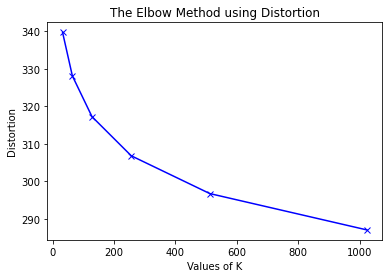

In [72]:
plt.plot([32,64,128,256,512,1024], f_distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [69]:
#select number of k (k-means). take long to run(I got 26 clusters with Elbow method)
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
# f_distortions = []
# f_inertias = []
mapping1 = {}
mapping2 = {}
f_silhouette=[]
batch_size = np.size(os.listdir('Downloads/dog')) * 3
K = [1024]
x=np.array(features)
for k in K:
    print(k)
    # Building and fitting the model
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(features) 
    sse=sum(np.min(cdist(x, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0]

    f_distortions.append(sse)
    f_inertias.append(kmeans.inertia_)
 
#    mapping1[k] = sum(np.min(cdist(x, kmeans.cluster_centers_,
#                                    'euclidean'), axis=1)) / x.shape[0]
#     mapping2[k] = kmeans.inertia_
    
#    f_silhouette.append(silhouette_score(x, kmeans.labels_))

    print('distrotions')
    print(distortions)
    print('silhouette')
    print(silhouette)
        
sil_k=K[(f_silhouette.index(max(f_silhouette)))]
print('All silhoutte: ')
print(sil_k)

from kneed import KneeLocator
kn = KneeLocator(K, f_distortions, curve='convex', direction='decreasing')
knee_k=(kn.knee)
print('All knee:')
print(knee_k)

1024
Init 1/3 with method: k-means++
Inertia for init 1/3: 1747818419.128811
Init 2/3 with method: k-means++
Inertia for init 2/3: 1745358648.775741
Init 3/3 with method: k-means++
Inertia for init 3/3: 1743722596.707912
Minibatch iteration 1/16600: mean batch inertia: 88876.025921, ewa inertia: 88876.025921 
Minibatch iteration 2/16600: mean batch inertia: 88246.004194, ewa inertia: 88868.413249 
Minibatch iteration 3/16600: mean batch inertia: 87424.228751, ewa inertia: 88850.962893 
Minibatch iteration 4/16600: mean batch inertia: 87525.293655, ewa inertia: 88834.944579 
Minibatch iteration 5/16600: mean batch inertia: 86527.536032, ewa inertia: 88807.063722 
Minibatch iteration 6/16600: mean batch inertia: 86568.662064, ewa inertia: 88780.016689 
Minibatch iteration 7/16600: mean batch inertia: 86630.763089, ewa inertia: 88754.046849 
Minibatch iteration 8/16600: mean batch inertia: 86734.934710, ewa inertia: 88729.649533 
Minibatch iteration 9/16600: mean batch inertia: 86630.0314

Minibatch iteration 89/16600: mean batch inertia: 84708.389077, ewa inertia: 86352.455246 
Minibatch iteration 90/16600: mean batch inertia: 85261.940466, ewa inertia: 86339.278349 
Minibatch iteration 91/16600: mean batch inertia: 84585.584862, ewa inertia: 86318.088136 
Minibatch iteration 92/16600: mean batch inertia: 84451.827323, ewa inertia: 86295.537752 
Minibatch iteration 93/16600: mean batch inertia: 85168.405045, ewa inertia: 86281.918393 
Minibatch iteration 94/16600: mean batch inertia: 84783.196807, ewa inertia: 86263.809055 
Minibatch iteration 95/16600: mean batch inertia: 84449.704215, ewa inertia: 86241.888881 
Minibatch iteration 96/16600: mean batch inertia: 84076.078349, ewa inertia: 86215.718980 
Minibatch iteration 97/16600: mean batch inertia: 84784.012729, ewa inertia: 86198.419401 
Minibatch iteration 98/16600: mean batch inertia: 84964.409340, ewa inertia: 86183.508622 
Minibatch iteration 99/16600: mean batch inertia: 84657.185067, ewa inertia: 86165.065764 

Minibatch iteration 179/16600: mean batch inertia: 83789.156671, ewa inertia: 85066.845851 
Minibatch iteration 180/16600: mean batch inertia: 84281.539393, ewa inertia: 85057.356844 
Minibatch iteration 181/16600: mean batch inertia: 84590.219656, ewa inertia: 85051.712337 
Minibatch iteration 182/16600: mean batch inertia: 84483.712977, ewa inertia: 85044.849092 
Minibatch iteration 183/16600: mean batch inertia: 84303.015848, ewa inertia: 85035.885380 
Minibatch iteration 184/16600: mean batch inertia: 84275.634369, ewa inertia: 85026.699122 
Minibatch iteration 185/16600: mean batch inertia: 83835.266061, ewa inertia: 85012.302810 
Minibatch iteration 186/16600: mean batch inertia: 84215.217969, ewa inertia: 85002.671482 
Minibatch iteration 187/16600: mean batch inertia: 84082.042188, ewa inertia: 84991.547343 
Minibatch iteration 188/16600: mean batch inertia: 84718.613479, ewa inertia: 84988.249431 
Minibatch iteration 189/16600: mean batch inertia: 84555.757426, ewa inertia: 84

Minibatch iteration 269/16600: mean batch inertia: 83621.980501, ewa inertia: 84527.571408 
Minibatch iteration 270/16600: mean batch inertia: 84218.804917, ewa inertia: 84523.840524 
Minibatch iteration 271/16600: mean batch inertia: 84331.003171, ewa inertia: 84521.510434 
Minibatch iteration 272/16600: mean batch inertia: 84062.387923, ewa inertia: 84515.962769 
Minibatch iteration 273/16600: mean batch inertia: 84043.715686, ewa inertia: 84510.256518 
Minibatch iteration 274/16600: mean batch inertia: 84000.735546, ewa inertia: 84504.099879 
Minibatch iteration 275/16600: mean batch inertia: 84108.886976, ewa inertia: 84499.324446 
Minibatch iteration 276/16600: mean batch inertia: 84860.414585, ewa inertia: 84503.687567 
Minibatch iteration 277/16600: mean batch inertia: 84164.612505, ewa inertia: 84499.590458 
Minibatch iteration 278/16600: mean batch inertia: 83917.441361, ewa inertia: 84492.556240 
Minibatch iteration 279/16600: mean batch inertia: 84019.163448, ewa inertia: 84

Minibatch iteration 359/16600: mean batch inertia: 83923.481544, ewa inertia: 84234.391312 
Minibatch iteration 360/16600: mean batch inertia: 84288.723377, ewa inertia: 84235.047816 
Minibatch iteration 361/16600: mean batch inertia: 84128.669431, ewa inertia: 84233.762426 
Minibatch iteration 362/16600: mean batch inertia: 83911.908972, ewa inertia: 84229.873410 
Minibatch iteration 363/16600: mean batch inertia: 83717.498564, ewa inertia: 84223.682287 
Minibatch iteration 364/16600: mean batch inertia: 84109.628065, ewa inertia: 84222.304148 
Minibatch iteration 365/16600: mean batch inertia: 83821.878218, ewa inertia: 84217.465725 
Minibatch iteration 366/16600: mean batch inertia: 83955.653408, ewa inertia: 84214.302197 
Minibatch iteration 367/16600: mean batch inertia: 84128.655553, ewa inertia: 84213.267313 
Minibatch iteration 368/16600: mean batch inertia: 83911.342193, ewa inertia: 84209.619094 
Minibatch iteration 369/16600: mean batch inertia: 83940.126148, ewa inertia: 84

ValueError: max() arg is an empty sequence

In [39]:
a=np.array(features)

In [40]:
a.shape

(1159461, 32)

In [6]:
sse=sum(np.min(cdist(a, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / a.shape[0]

NameError: name 'cdist' is not defined

In [42]:
sse

339.7169625893111

In [7]:
#generate histogram
kmeans.verbose = False
histo_list = []
for file in files:
    #I got some random file in the folder
    if file != '.DS_Store' and '.jpg' in file: 
        img = cv2.imread(file)#Read file
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Grayscale processing, speed up calculation
# find the keypoints with ORB
        kp = orb.detect(img,None)
        # compute the descriptors with ORB
        kp2, des = orb.compute(img, kp)

        histo = np.zeros(k)
        nkp = np.size(kp2)
        for d in des:
            idx = kmeans.predict([d])
            histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

        histo_list.append(histo)

In [8]:
input_x = np.array(histo_list) 
print(input_x.shape)

(2335, 256)


In [9]:
#reduce dimension with PCA 0.95 explained variance
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(input_x)
reduced = pca.transform(input_x)
print(reduced.shape)

(2335, 218)


In [14]:
with open('orb_reduced_256.npy', 'wb') as f:
    np.save(f,reduced)


In [18]:
len(inertias)

255

In [ ]:
#select number of k (k-means). take long to run(I got 26 clusters with Elbow method)
from scipy.spatial.distance import cdist
#from sklearn.metrics import silhouette_score
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
silhouette=[]
K = range(2,300)
x=reduced
for k in K:
    print(k)
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    sse=sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0]
    distortions.append(sse)
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    if k!=2 and k%20==0:
        print('distrotions')
        print(distortions)
        
# sil_k=K[(silhouette.index(max(silhouette)))]
# print('All silhoutte: ')
# print(sil_k)

from kneed import KneeLocator
kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
knee_k=(kn.knee)
print('All knee:')
print(knee_k)

In [21]:
from kneed import KneeLocator
kn = KneeLocator(range(2,2+255), distortions, curve='convex', direction='decreasing')
knee_k=(kn.knee)
print('All knee:')
print(knee_k)

All knee:
17


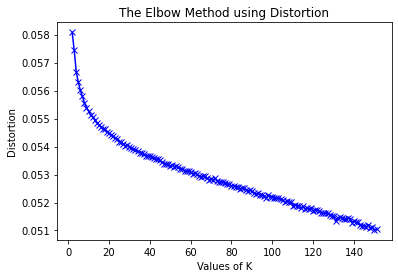

In [22]:
#Plot elbow plot
plt.plot(range(2,2+150), distortions[:150], 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [23]:
#Here use 26 as number of clusters for k-means to cluster images
import math
# path = r"home/zhu690/Downloads/dog/"
# # change the working directory to the path where the images are located
# os.chdir(path)


# # this list holds all the image filename
# flowers = []

# # creates a ScandirIterator aliased as files
# with os.scandir(path) as files:
#   # loops through each file in the directory
#     for file in files:
#         if file.name.endswith('.jpg'):
#           # adds only the image files to the flowers list
#             flowers.append(file.name)
flowers=imgs           
#change k number
reduced=input_x
kmeans = KMeans(n_clusters=int(17)).fit(reduced)
kmeans.fit(reduced)
#cluster dic key:index, val: filename
groups = {}
for file, cluster in zip(flowers,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)
y_kmeans = kmeans.predict(reduced)

result={}

fraction={}
for i in groups:
    fraction[i]=len(groups[i])
smallest=min(fraction.values())
for i in groups:
    fraction[i]=int(len(groups[i])/smallest)
    

#proportion to 10%
#calculate each point distance to centroid
def k_mean_distance(data, cantroid_matrix, i_centroid, cluster_labels):
    distances=[]
    # Calculate Euclidean distance for each data point assigned to centroid
    for file,x in zip(groups[i_centroid],data[cluster_labels == i_centroid]):
       # print(file)
        d=np.linalg.norm(x-cantroid_matrix)
        distances.append((file,d))
    # return the mean value
    return (distances)

# y_kmeans = kmeans.fit_predict(reduced)
centroids = kmeans.cluster_centers_
result={} #dictionary key as cluster index, value as ([image list],original cluster size)
sizes={}
for i in groups:
    sizes[i]=len(groups[i])

#select number of images from each cluster

for i in groups:
    fraction[i]=math.ceil(len(groups[i])*0.1)

for i, cent_features in enumerate(centroids):
    select_num=fraction[i]
    c_distances = k_mean_distance(reduced, cent_features, i, y_kmeans)
    sort_res=sorted(c_distances, key=lambda tup: tup[1])[:select_num]
    sort_res1=[x[0] for x in sort_res]
    if i not in result.keys():
        result[i] = []
        result[i].append((sort_res1,sizes[i]))
    else:
        result[i].append((sort_res1,sizes[i]))

print('orb_256_result_Knee:')
print(result)
with open('orb_256_set.txt', 'w') as f:
    print(result, file=f)

orb_256_result_Knee:
{0: [(['5791244.jpg', '3375134059.jpg', '7111002063.jpg', '3665549027.jpg', '2921198890.jpg', '2229179070.jpg', '285586547.jpg', '4855357158.jpg', '475042270.jpg', '464116251.jpg', '451326127.jpg', '413231421.jpg', '97731718.jpg'], 123)], 1: [(['3261493263.jpg', '2995461857.jpg', '512026551.jpg', '2190227737.jpg', '2273648636.jpg', '2467803152.jpg', '3373946160.jpg', '3238127070.jpg', '214501174.jpg', '398413603.jpg', '599366440.jpg', '2497608431.jpg', '2460159430.jpg', '392467282.jpg', '532457586.jpg', '3383037991.jpg', '2303951441.jpg', '2074764331.jpg', '733752482.jpg', '224702242.jpg'], 200)], 2: [(['269630255.jpg', '293327462.jpg', '2079554580.jpg', '3518608016.jpg', '348380010.jpg', '3047144646.jpg', '2838125339.jpg', '4296373889.jpg', '453756106.jpg', '272940778.jpg', '3415589320.jpg'], 106)], 3: [(['4926719517.jpg', '2377460540.jpg', '2384147448.jpg', '427936315.jpg', '3014546644.jpg', '2635905544.jpg', '365759754.jpg', '2505465055.jpg', '3634785801.jpg', '

In [24]:
def view_cluster(cluster):
    plt.figure(figsize = (45,45));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:50]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [37]:
w=0
for i in result:
    a=result[i]
    print(len(a[0][0]))
    w+=len(a[0][0])

13
20
11
27
29
16
1
16
16
1
2
2
6
25
9
16
30


In [38]:
w

240

In [25]:
cd Downloads/dog

/home/zhu690/Downloads/dog


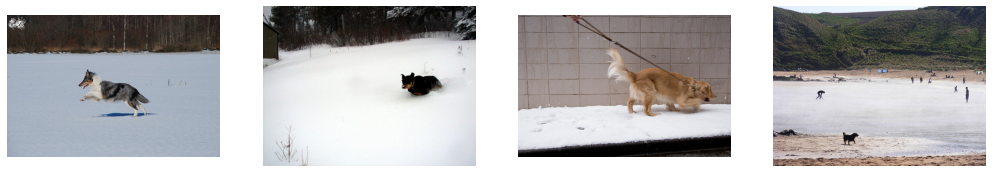

In [31]:
from tensorflow.keras.preprocessing.image import load_img 
view_cluster(9)

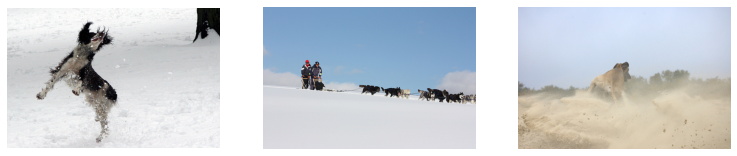

In [30]:
view_cluster(6)

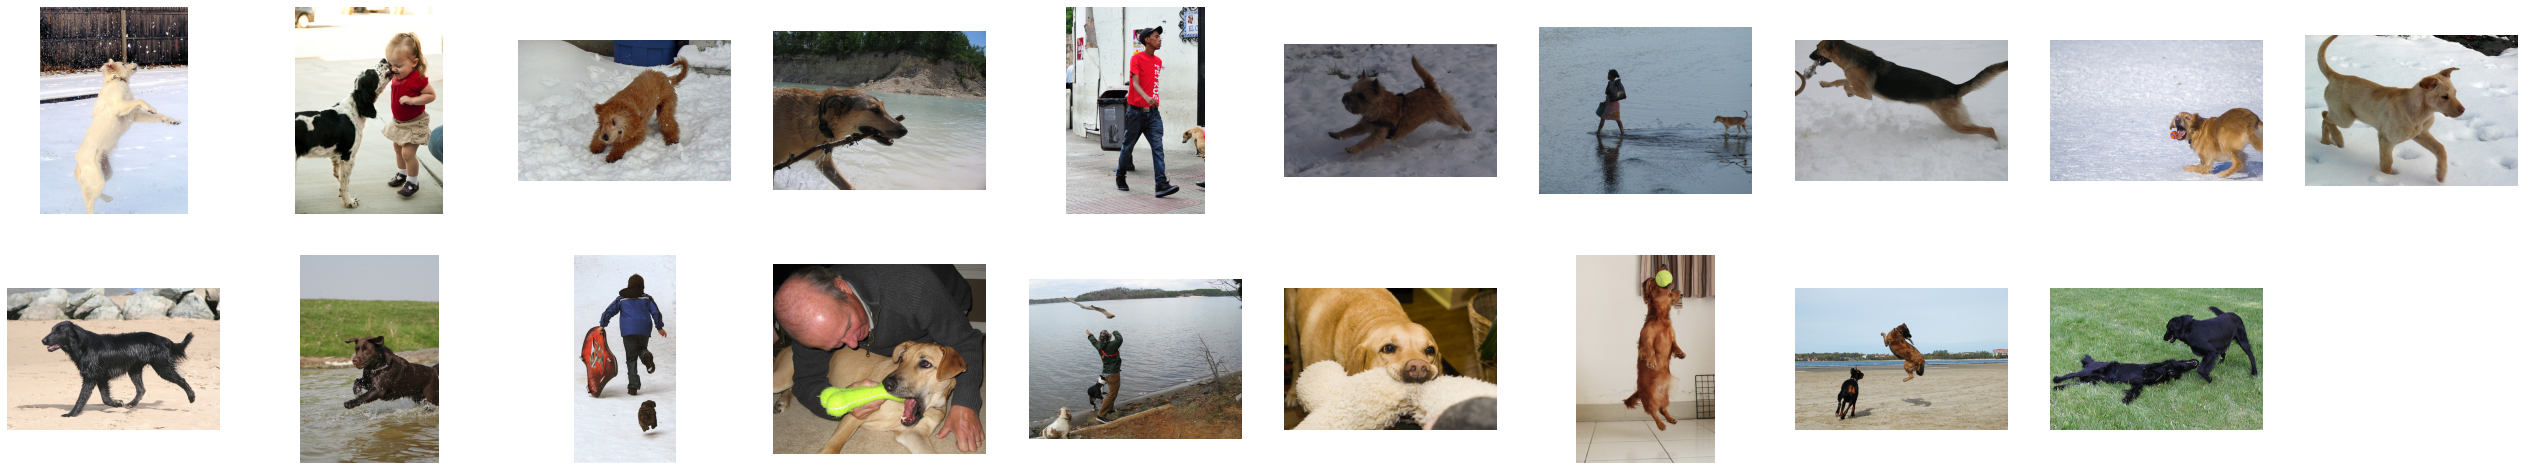

In [32]:
view_cluster(10)

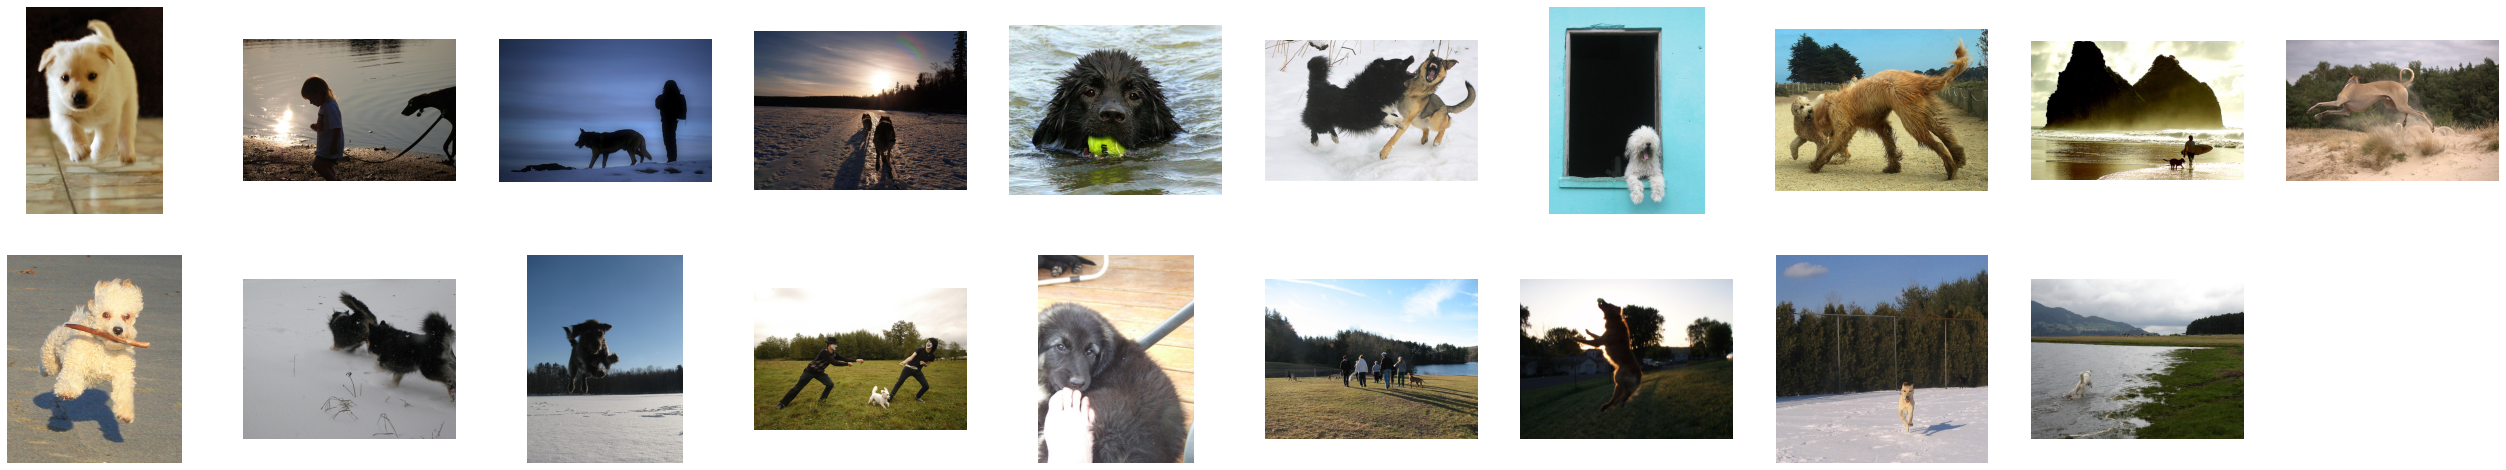

In [35]:
view_cluster(11)